# GANs on Fashion MNIST

1. [Setup](#1.-Setup)
2. [Load Fashion MNIST](#2.-Load-Fashion-MNIST)
3. [Prepare for the training](#3.-Prepare-for-the-training)
4. [Training a VanillaGAN](#4.-Training-a-VanillaGAN)
5. [Training a DCGAN](#5.-Training-a-DCGAN)
6. [Image generation (comparison)](#6.-Image-generation-\(comparison\))

## 1. Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import tensorflow as tf

from dc_gan import DCGAN
from vanilla_gan import VanillaGAN
from vis import grid_vis, plot_loss_evolution

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
print(f'sys.version: {sys.version}')
print(f'numpy.__version__: {np.__version__}')
print(f'tf.__version__: {tf.__version__}')

sys.version: 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 19:16:44) 
[GCC 7.3.0]
numpy.__version__: 1.15.3
tf.__version__: 1.11.0


## 2. Load Fashion MNIST

In [3]:
DATASET_NAME = 'FashionMNIST'
IMG_H = 28
IMG_W = 28
IMG_C = 1

X_train: (60000, 28, 28, 1) float64 [-1.0, 1.0]


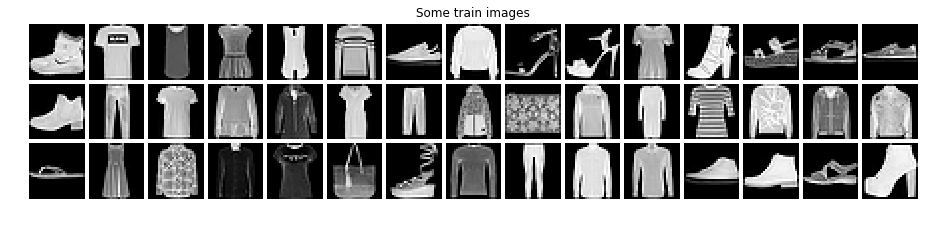

In [4]:
(X_train, y_train), _ = tf.keras.datasets.fashion_mnist.load_data()

X_train = X_train.reshape(-1, IMG_H, IMG_W, IMG_C) # NHWC
X_train = X_train / 255.   # [0., 1.]
X_train = 2 * X_train - 1  # [-1., 1.]

print('X_train: ', end='')
print(X_train.shape, X_train.dtype, end=' ')
print(f'[{X_train.min()}, {X_train.max()}]')

grid_vis(X_train, img_h=IMG_H, img_w=IMG_W, img_c=IMG_C, 
         rows=3, plt_title='Some train images')

## 3. Prepare for the training

In [5]:
Z_DIM = 50
NUM_EPOCHS = 10
BATCH_SIZE = 128
PRINT_EVERY = 2

VanillaGAN_LR = 1e-3
DCGAN_LR = 2e-4

In [6]:
def train_gan(gan_type='VanillaGAN'):
    GAN = None
    if gan_type.lower() == 'vanillagan':
        GAN = VanillaGAN
        LR = VanillaGAN_LR
    elif gan_type.lower() == 'dcgan':
        GAN = DCGAN
        LR = DCGAN_LR
        
    gan = GAN(z_dim=Z_DIM, img_h=IMG_H, img_w=IMG_W, img_c=IMG_C, dataset_name=DATASET_NAME)
    
    (D_loss, G_loss) = gan.train(X_train, 
                                 batch_size=BATCH_SIZE,
                                 num_epochs=NUM_EPOCHS,
                                 print_every=PRINT_EVERY,
                                 lr=LR)
    return gan, D_loss, G_loss

def generate_images(gan):
    generated_images = gan.generate_images_np(num_images=75)
    grid_vis(generated_images,
             img_h=IMG_H, img_w=IMG_W, img_c=IMG_C, rows=5, cols=15, 
             plt_title=f'Generated images ({gan.gan_type} on {gan.dataset_name})')

## 4. Training a VanillaGAN

Epoch 0


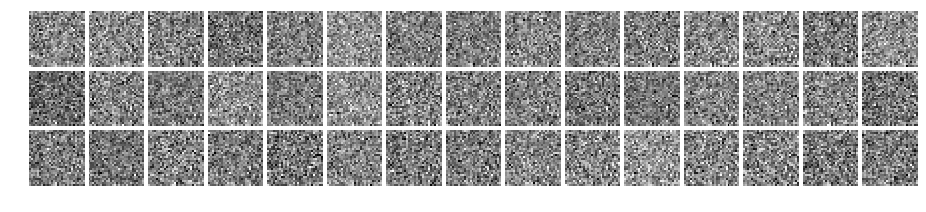

Epoch: 2, D_loss: 1.1808, G_loss: 1.3074


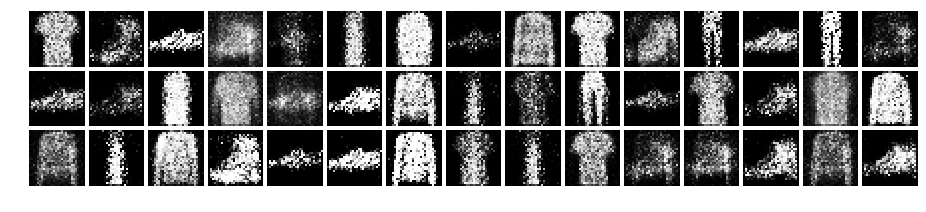

Epoch: 4, D_loss: 1.3273, G_loss: 0.8834


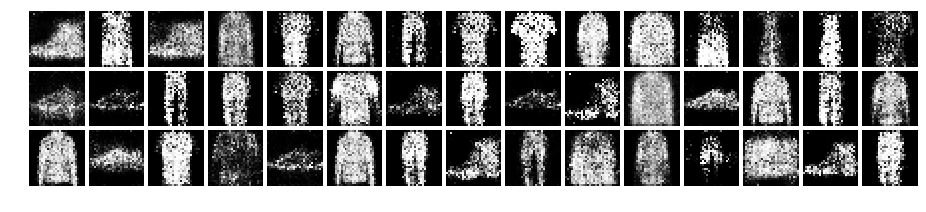

Epoch: 6, D_loss: 1.3543, G_loss: 0.8121


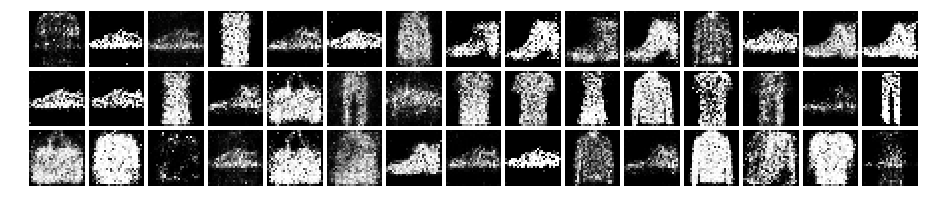

Epoch: 8, D_loss: 1.3637, G_loss: 0.7767


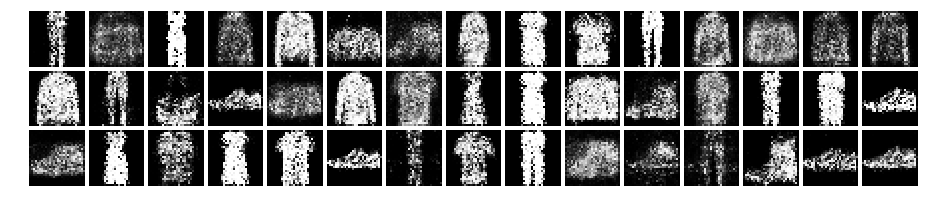

Epoch: 10, D_loss: 1.3682, G_loss: 0.7607


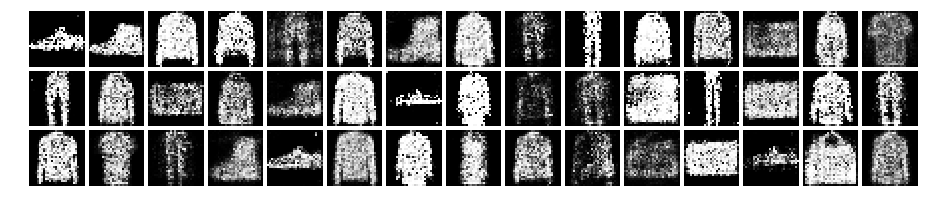

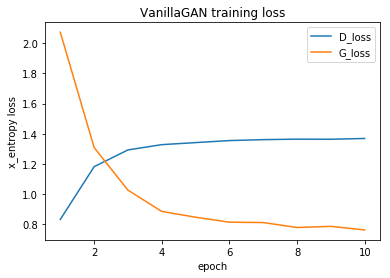

CPU times: user 32.1 s, sys: 4.34 s, total: 36.4 s
Wall time: 29.7 s


In [7]:
%%time
vanilla_gan, D_loss, G_loss = train_gan(gan_type='VanillaGAN')
plot_loss_evolution(D_loss=D_loss, G_loss=G_loss, gan_type='VanillaGAN')

## 5. Training a DCGAN

Epoch 0


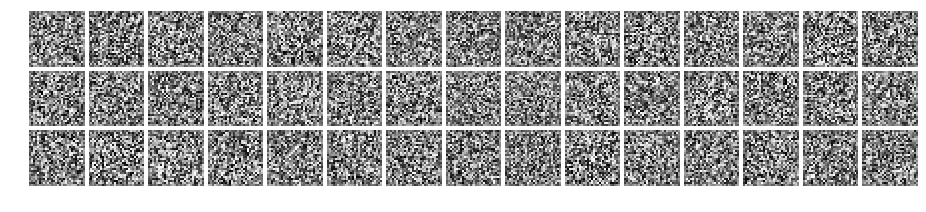

Epoch: 2, D_loss: 1.1763, G_loss: 0.9749


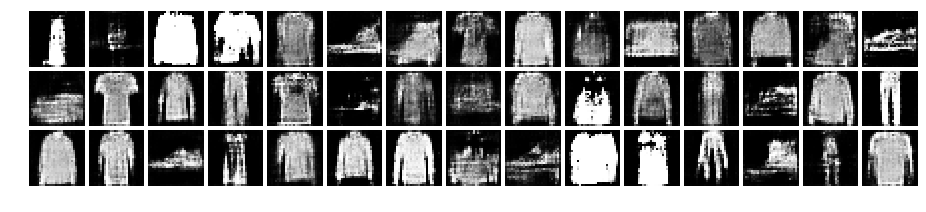

Epoch: 4, D_loss: 1.2634, G_loss: 0.8428


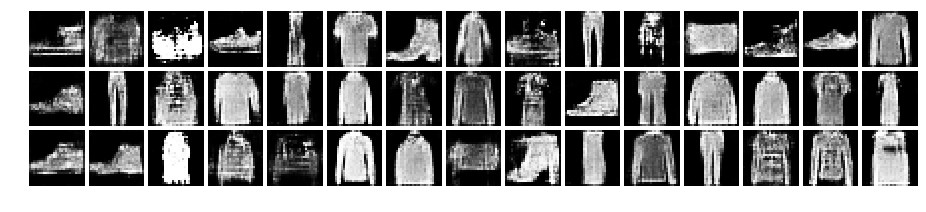

Epoch: 6, D_loss: 1.2956, G_loss: 0.8107


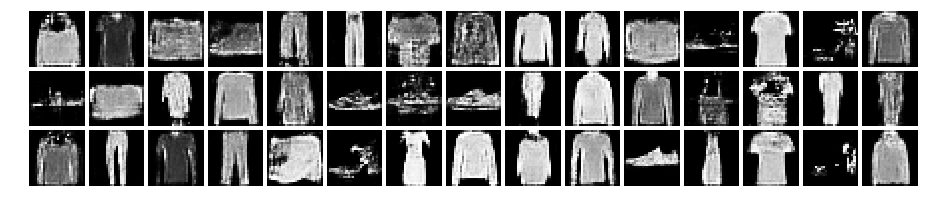

Epoch: 8, D_loss: 1.3068, G_loss: 0.7969


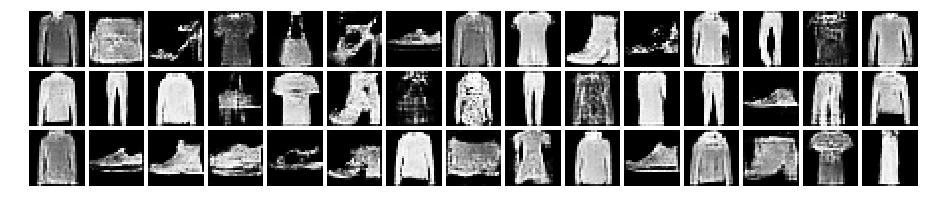

Epoch: 10, D_loss: 1.3009, G_loss: 0.8038


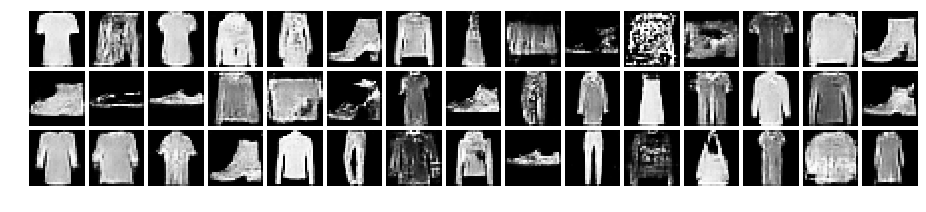

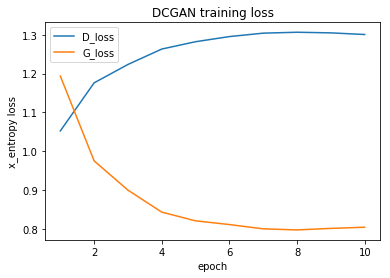

CPU times: user 2min 21s, sys: 21.9 s, total: 2min 43s
Wall time: 3min 16s


In [8]:
%%time
dc_gan, D_loss, G_loss = train_gan(gan_type='DCGAN')
plot_loss_evolution(D_loss=D_loss, G_loss=G_loss, gan_type='DCGAN')

## 6. Image generation (comparison)

INFO:tensorflow:Restoring parameters from ./saved_models/VanillaGAN_FashionMNIST.ckpt


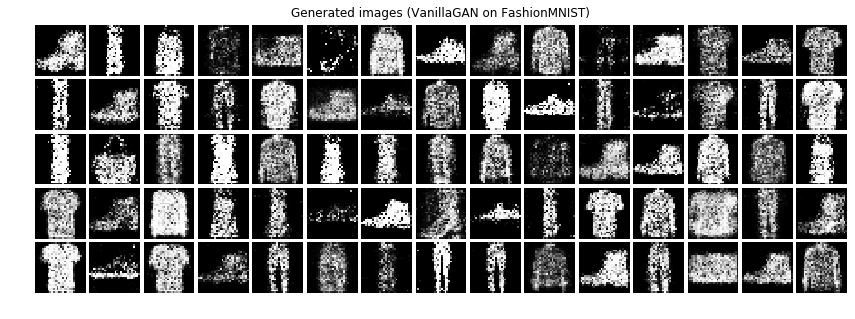

INFO:tensorflow:Restoring parameters from ./saved_models/DCGAN_FashionMNIST.ckpt


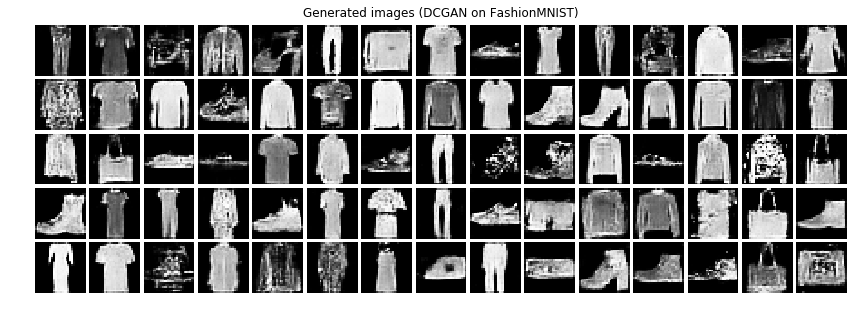

In [9]:
generate_images(vanilla_gan)
generate_images(dc_gan)